In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
sns.set_style("darkgrid")
%matplotlib inline

In [5]:
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


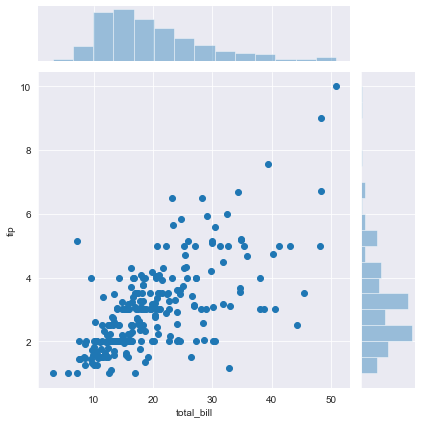

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips);

In [7]:
from scipy.stats import pearsonr
r,p = pearsonr(tips.total_bill,tips.tip)
print(f'r: {r:.2f}, p: {p:.2f}')

r: 0.68, p: 0.00


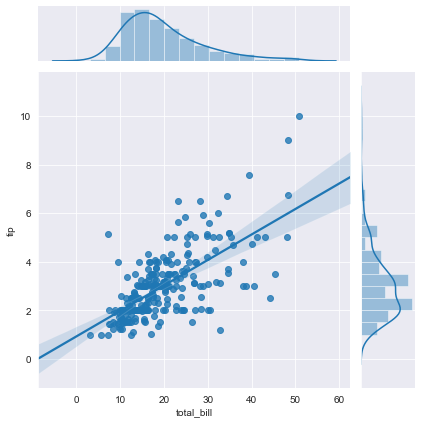

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg');

# statsmodels: Linear Regression

### Univariate Regression

In [16]:
import statsmodels.api as sm
#Linear regression by statsmodels.api.OLS(y,x)

X = tips['total_bill']         # independent variable
X = sm.add_constant(X)         # bias term, note how it is added
print(type(X))
X.head(5)

<class 'pandas.core.frame.DataFrame'>


,const,total_bill
0,1.0,16.99
1,1.0,10.34
2,1.0,21.01
3,1.0,23.68
4,1.0,24.59


In [18]:
y = tips['tip']                # dependent variable
model_slr = sm.OLS(y,X).fit()  # initialize the model and fit
model_slr.params

const         0.920270
total_bill    0.105025
dtype: float64

### Draw the regression line

In [29]:
np.array([[1,0],[1,50]])
#note the 1 here as const term

array([[ 1,  0],
       [ 1, 50]])

In [30]:
y_hat = model_slr.predict(np.array([[1,0],[1,50]]))

In [31]:
y_hat

array([0.92026961, 6.17149548])

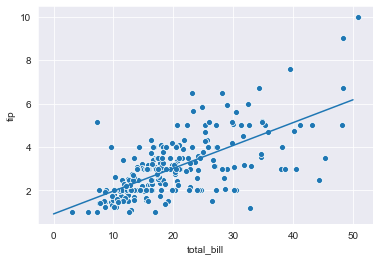

In [28]:
ax = sns.scatterplot(tips.total_bill,tips.tip);
ax.plot([0,50],y_hat);

### Residuals

The residuals should be like the normal distribution, i.e. the following

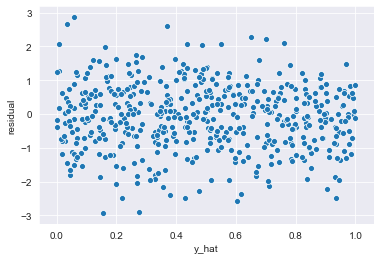

In [35]:
x_obs = np.random.rand(500)                              # our observed x values
y_obs = 1 * x_obs + 0 + np.random.normal(0,1.0,size=(500)) # observed y, with error
y_hat = 1 * x_obs + 0                                      # a very good guess
resid = y_obs - y_hat                                   # residuals
ax = sns.scatterplot(y_hat,resid);
ax.set_xlabel('y_hat'); ax.set_ylabel('residual');

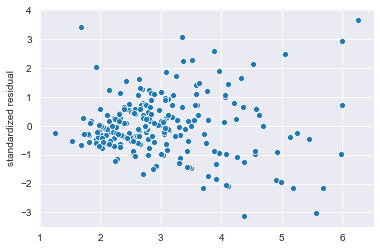

In [37]:
ax = sns.scatterplot(model_slr.predict(),model_slr.resid/np.std(model_slr.resid))
ax.set_ylabel('standardized residual');

In [38]:
model_slr.rsquared

0.45661658635167646

### multivariate regression

In [42]:
#sm.OLS takes multi-variable
X = tips[['total_bill','size']]
X = sm.add_constant(X)
y = tips['tip']
model_mlr = sm.OLS(y,X).fit()
model_mlr.params

const         0.668945
total_bill    0.092713
size          0.192598
dtype: float64

In [43]:
model_mlr.rsquared, model_mlr.rsquared_adj

(0.46786930879612587, 0.46345328646248374)

In [44]:
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           9.67e-34
Time:                        18:22:39   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Classification

In [45]:
def map_tips(x):
    return True if x > tips.tip.median() else False
tips['tip_high'] = tips.tip.apply(map_tips)

In [46]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_high
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,False
2,21.01,3.50,Male,No,Sun,Dinner,3,True


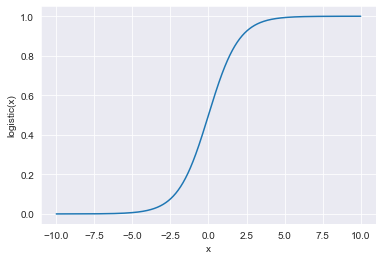

In [47]:
def logistic(x):
    return 1 / (1+np.exp(-x))
x = np.linspace(-10,10,1000)
plt.plot(x,logistic(x));
plt.xlabel('x');plt.ylabel('logistic(x)');

In [48]:
from sklearn.linear_model import LogisticRegression
#use logistic regression from sklearn

lr = LogisticRegression(fit_intercept=True)
#initialize lr

lr.fit(tips.total_bill.values.reshape(-1,1),tips.tip_high)

print(f'alpha = {lr.intercept_[0]:0.2f}')
print(f'beta_1 = {lr.coef_[0][0]:0.2f}')

alpha = -2.96
beta_1 = 0.16


/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


$y_i=logistic(β_0+β_1 x_i)+ε_i$ -> $log(\frac{y_i}{1−y_i})=β_0+β_1x_i$, which is log odds ratio of p(y=1)/p(y=0)  
Let’s say that the probability of success of some event is .8.  Then the probability of failure is 1 – .8 = .2.  The odds of success are defined as the ratio of the probability of success over the probability of failure.  In our example, the odds of success are .8/.2 = 4.

# Sklearn

#import the model  
from sklearn import Model  

#instantiate and set any hyperparameters  
model = Model()

#fit/train the model on the data  
model.fit(X,y)

#generate predictions using trained model  
yhat = model.predict(X)

#measure model performance  
yhat = model.score(y,yhat)

#transform data  
X_new = model.transform(X)

In [50]:
from sklearn import datasets
wine = datasets.load_wine()
X = pd.DataFrame(wine.data,columns=wine.feature_names)
y = wine.target

In [51]:
# keep only class 0 and 1 and two columns of X
features = wine.feature_names[3:5]

# standardize X
X = X.iloc[y < 2,3:5].apply(lambda x: (x-x.mean())/x.std()).values

y = y[y < 2]

X.shape,y.shape

((130, 2), (130,))

In [56]:
features

['alcalinity_of_ash', 'magnesium']

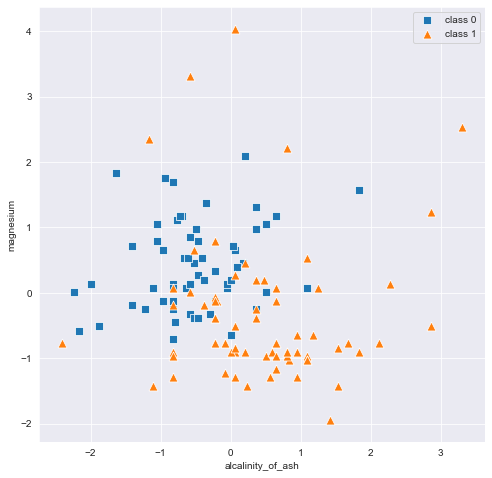

In [60]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.scatterplot(X[y==0,0],X[y==0,1],label='class 0',marker='s',s=80);
sns.scatterplot(X[y==1,0],X[y==1,1],label='class 1',marker='^',s=80);
plt.xlabel(features[0]); 
plt.ylabel(features[1]);

## Sklearn: logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

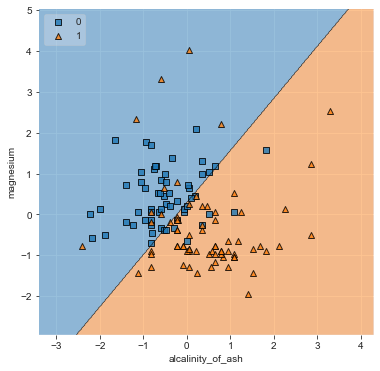

In [63]:
from mlxtend.plotting import plot_decision_regions
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=lr, legend=2);
plt.xlabel(features[0]); 
plt.ylabel(features[1]);

## SKlearn SVM:

In [65]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X,y)

/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

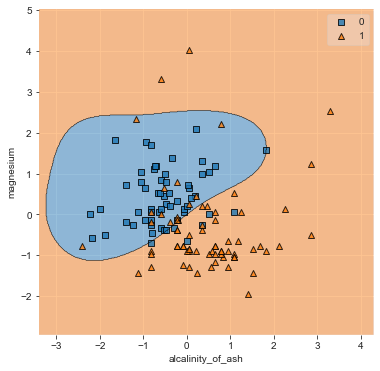

In [67]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=svc);
plt.xlabel(features[0]); 
plt.ylabel(features[1]);

### SKlearn: KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

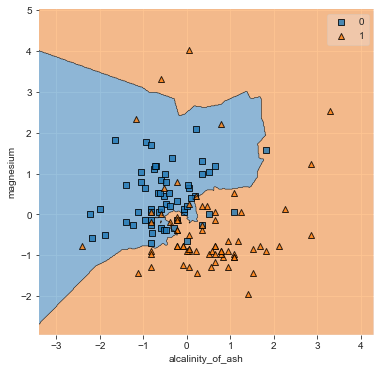

In [69]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=knn);
plt.xlabel(features[0]); plt.ylabel(features[1]);

### SKlearn: Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

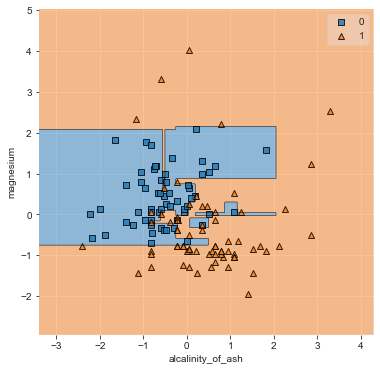

In [71]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=dtc);
plt.xlabel(features[0]); plt.ylabel(features[1]);

### Sklearn: Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

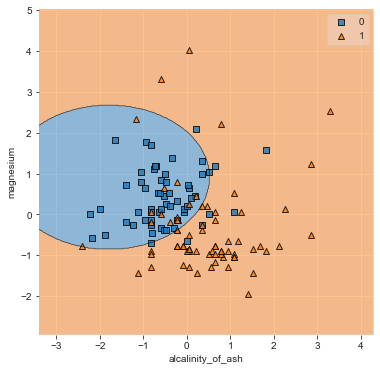

In [76]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=gnb);
plt.xlabel(features[0]); plt.ylabel(features[1]);

In [77]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X,y)

/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

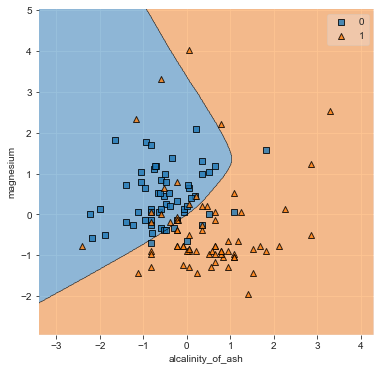

In [78]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=mlp);
plt.xlabel(features[0]); plt.ylabel(features[1]);

### SKlearn: Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X,y)

/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

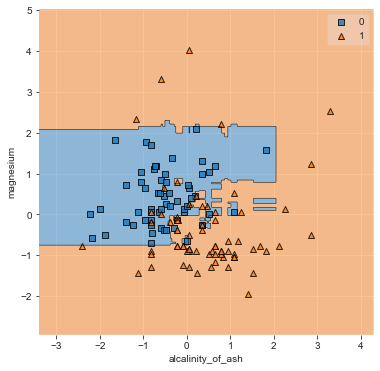

In [80]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=rfc);
plt.xlabel(features[0]); plt.ylabel(features[1]);

### SKlearn: Gradient Boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

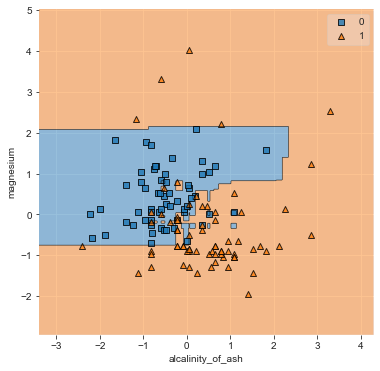

In [82]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=gbc);
plt.xlabel(features[0]); plt.ylabel(features[1]);

### mlxtend: Stacking

In [83]:
from mlxtend.classifier import StackingClassifier
ensemble = [LogisticRegression(),GaussianNB(),KNeighborsClassifier()]
stc = StackingClassifier(ensemble,LogisticRegression())
stc.fit(X,y)

/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                GaussianNB(priors=None, var_smoothing=1e-09),
                                KNeighborsClassifi...
                   meta_classifier=

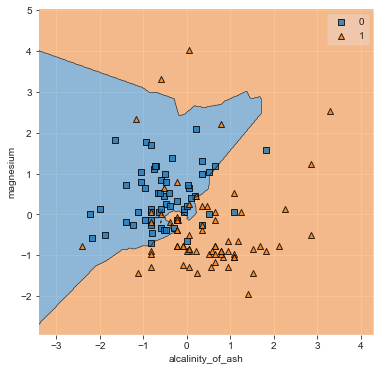

In [84]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=stc);
plt.xlabel(features[0]); plt.ylabel(features[1]);

# Model Evaluation

Steps to Choosing a Model
1. Create Held-Aside Set (Train/Test Split)
2. Determine Metric (or combination of metrics)
3. Get a Baseline for comparison
4. Use Cross-Validation to fit Hyperparameters and Choose Model
5. Evaluate Chosen Model on Held-Aside Set

In [5]:
from sklearn.model_selection import train_test_split
tips = sns.load_dataset('tips')
X_tips = tips[['total_bill','size']]
y_tips = tips.tip
X_train,X_test,y_train,y_test = train_test_split(X_tips, y_tips, random_state=123)

In [6]:
X_tips.shape, y_tips.shape # original dataset

((244, 2), (244,))

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((183, 2), (61, 2), (183,), (61,))

In [11]:
X_test.shape[0]/X_tips.shape[0] # default size of test is 20%

0.25

### Baseline: doing better than dummy!

In [12]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor().fit(X_train,y_train)

In [14]:
dummy_reg.predict([[0,0], [1,1]])

array([2.98797814, 2.98797814])

In [15]:
y_train.mean()

2.9879781420765026

In [16]:
dummy_reg.score(X_test,y_test)

-0.001154933013596926

#### R^2

In [21]:
from sklearn.metrics import r2_score
y_hat = dummy_reg.predict(X_test) # get predictions
r2_score(y_hat,y_test)

-8.290907243641552e+29

In [19]:
def adj_r2_score(r2,num_items,num_parameters):
    return 1 - (1-r2)*num_items/(num_items-num_parameters-1)
adj_r2_score(r2_score(y_test,y_hat),*X_test.shape)

-0.05293880885912783

#### RMSE

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_hat)

1.4715838334975666

In [24]:
def rmse(mse):
    return np.sqrt(mse)
rmse(mean_squared_error(y_test,y_hat))

1.2130885513834373

In [25]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression().fit(X_train,y_train)

print(linr.score(X_test,y_test))
print(adj_r2_score(linr.score(X_test,y_test),*X_test.shape))
print(rmse(mean_squared_error(y_test,linr.predict(X_test))))


0.4697819853335492
0.44235691560942236
0.8828137684958169


## Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score
# using r2_score
scores = cross_val_score(linr, X_train, y_train, cv=5)
scores

array([0.5185481 , 0.36881821, 0.15564532, 0.19597956, 0.42043896])

In [29]:
print(f'{np.mean(scores)} +- {2*np.std(scores)}')

0.33188603318684373 +- 0.2736124143476744


In [30]:
scores = cross_val_score(linr, X_train, y_train, cv=5,
                         scoring='neg_mean_squared_error')
-scores

array([1.8344124 , 0.99583105, 1.13737252, 0.7406604 , 1.13291782])

In [32]:
print(f'{np.mean(-scores)} +- {2*np.std(scores)}')

1.16823883672216 +- 0.7258293398455163


### Compare Models with CV

In [33]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
scores = cross_val_score(lasso, X_train, y_train, cv=5,
                         scoring='neg_mean_squared_error')
-scores

array([2.1123054 , 0.99339717, 0.9962454 , 0.72778292, 1.17864365])

In [34]:
print(f'{np.mean(-scores)} +- {2*np.std(scores)}')

1.201674909794199 +- 0.9549587839640695


### Tuning Hyperparameters with CV

In [38]:
from sklearn.linear_model import LassoCV
alphas = [.01, .1, .5, .9, .99, 1]
lassocv = LassoCV(alphas=alphas,cv=5).fit(X_train,y_train)
lassocv.alpha_

0.01

what it does is

In [36]:
mean_scores = []
for alpha in [.01, .1, .5, .9, .99, 1]:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso,X_train,y_train,cv=5,
                             scoring='neg_mean_squared_error')
    mean_scores.append( (alpha,-np.mean(scores)) )

In [37]:
# find the setting with the lowest mse
sorted(mean_scores,key=lambda x:x[1])[0]

(0.01, 1.1701318672271284)

### Visualize Hyperparameter Tuning

In [41]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
depths = np.arange(1,15)
train_scores,test_scores = validation_curve(DecisionTreeRegressor(),
                                            X_train, y_train,
                                            'max_depth',
                                            depths,
                                            cv=5,
                                            scoring='r2'
                                           )
mean_train_scores = np.mean(train_scores,1)
mean_test_scores = np.mean(test_scores,1)

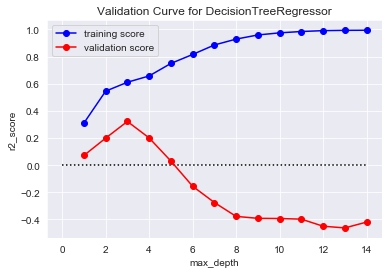

In [43]:
plt.plot(depths, mean_train_scores, 'o-', color='b',label='training score');
plt.plot(depths, mean_test_scores, 'o-', color='r', label='validation score');
plt.xlabel('max_depth'), plt.ylabel('r2_score');
plt.title('Validation Curve for DecisionTreeRegressor');
plt.hlines(0,0,14,ls=':'); plt.legend(loc='best');

### More than one tuning: grid_search

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[5,10,20],
          'max_depth': [3,5,10]}
gscv = GridSearchCV(RandomForestRegressor(),params,cv=3,
                    scoring='neg_mean_squared_error')
gscv.fit(X_train,y_train)
print(gscv.best_params_)

{'max_depth': 3, 'n_estimators': 20}


In [46]:
scores = cross_val_score(gscv.best_estimator_,X_train,y_train,cv=5,
                         scoring='neg_mean_squared_error')
print(f'{np.mean(-scores)} +- {2*np.std(scores)}')

1.26008931088854 +- 0.9759653669362114


### Training Set: 

In [47]:
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores = learning_curve(gscv.best_estimator_,
                                                      X_train, y_train,
                                                      cv=5,
                                                      scoring='r2'
                                                     )
mean_train_scores = np.mean(train_scores,1)
mean_test_scores = np.mean(test_scores,1)

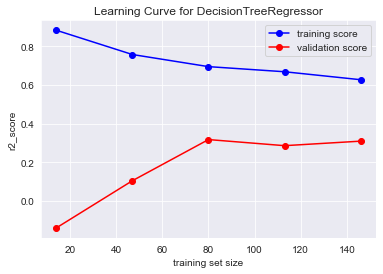

In [48]:
plt.plot(train_sizes, mean_train_scores, 'o-', color="b", label="training score");
plt.plot(train_sizes, mean_test_scores, 'o-', color="r", label="validation score")
plt.xlabel('training set size'), plt.ylabel('r2_score');
plt.title('Learning Curve for DecisionTreeRegressor');
plt.legend(loc="best");

## Sample Dataset: Classification

In [52]:
from sklearn import datasets
wine = datasets.load_wine()
X_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
y_wine = wine.target
features_wine = wine.feature_names[3:5]
X_wine = X_wine.iloc[y_wine < 2,3:5].apply(lambda x: (x-x.mean())/x.std()).values
y_wine = y_wine[y_wine < 2]
X_wine.shape,y_wine.shape

((130, 2), (130,))

In [53]:
# split into a train and test set
X_train,X_test,y_train,y_test = train_test_split(X_wine,y_wine,
                                                 stratify=y_wine,
                                                 test_size=.1,
                                                 random_state=123)

In [54]:
X_train.shape, X_test.shape

((117, 2), (13, 2))

#### Classification: Baseline Accuracy
What's our simple guess?

In [57]:
sum(y_train == 1) / len(y_train)

0.5470085470085471

In [58]:
from sklearn.dummy import DummyClassifier
dummy_cl = DummyClassifier(strategy='most_frequent')
dummy_cl.fit(X_train,y_train)
dummy_cl.predict([[0,0]])

array([1])

In [59]:
scores = cross_val_score(dummy_cl,X_train,y_train,cv=5)
print(f'{np.mean(scores)} +- {2*np.std(scores)}')

0.5471343873517787 +- 0.01831949364408387


In [66]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
scores = cross_val_score(logr,X_train,y_train,cv=5)
print(f'{np.mean(scores)} +- {2*np.std(scores)}')

0.8216403162055336 +- 0.1285133830926686


/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logisti

### Precision-recall curve

In [70]:
# return predicted class probabilities
logr.fit(X_train,y_train)
y_pred_logr = logr.predict_proba(X_train) 
y_pred_logr[:3,:]

/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.78291503, 0.21708497],
       [0.15189349, 0.84810651],
       [0.61258622, 0.38741378]])

In [71]:
# get a matrix of p(y_i=1) and y_i pairs
tmp = np.transpose(np.vstack([y_pred_logr[:,1],y_train]))
# sort by p(y_i=1) descending
tmp = np.array(sorted(tmp,key=lambda x:x[0])[::-1])
tmp[:3]

array([[0.98342816, 1.        ],
       [0.97426783, 1.        ],
       [0.96911429, 1.        ]])

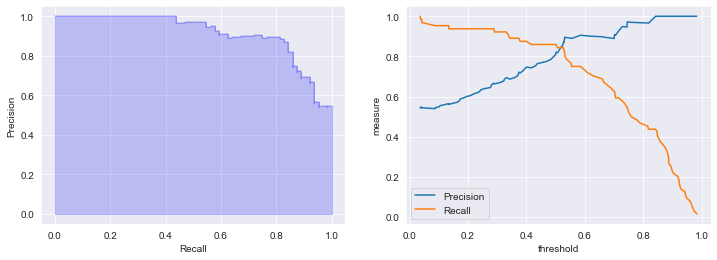

In [72]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_logr[:,1])
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].step(recall, precision, color='b', alpha=0.2, where='post');
ax[0].fill_between(recall, precision,color='b', step='post', alpha=0.2)
ax[0].set_xlabel('Recall');ax[0].set_ylabel('Precision');
ax[1].plot(thresholds,precision[:-1], label='Precision')
ax[1].plot(thresholds,recall[:-1],label='Recall')
ax[1].legend()
ax[1].set_xlabel('threshold');ax[1].set_ylabel('measure');

### A more quantitative measurement on precision-recall curve: f1 value

$f_1 = 2*\frac{precision⋅recall}{precision+recall}$, where precision = $\frac{TP}{TP+FP}$, recall = $\frac{TP}{TP+FN}$

In [74]:
scores = cross_val_score(logr,X_train,y_train,cv=5,scoring='f1')
print(f'{np.mean(scores)} +- {2*np.std(scores)}')

0.839247043145094 +- 0.11445817501943911


/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/linear_model/logisti

In [73]:
scores = cross_val_score(dummy_cl,X_train,y_train,cv=5,scoring='f1')
print(f'{np.mean(scores)} +- {2*np.std(scores)}')

0.7072425366543014 +- 0.015180813057843487


### ROC curve

In [75]:
# again sklearn to the rescue
from sklearn.metrics import roc_curve
fpr_logr, tpr_logr, _ = roc_curve(y_train, y_pred_logr[:,1])

In [76]:
def plot_roc(curves):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    lw = 2
    for fpr,tpr,model_name in curves:
        l1, = ax.plot(fpr, tpr, lw=lw, label=model_name)
    ax.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_aspect('equal', 'box')
    ax.set_title('Receiver operating characteristic example')
    ax.legend()

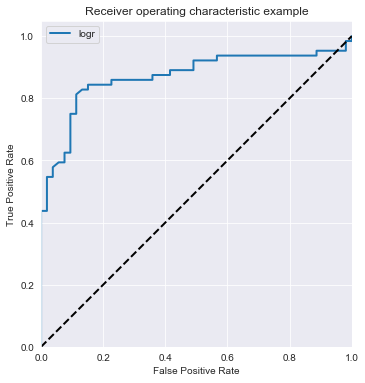

In [81]:
curves = [(fpr_logr,tpr_logr,'logr')]
plot_roc(curves);

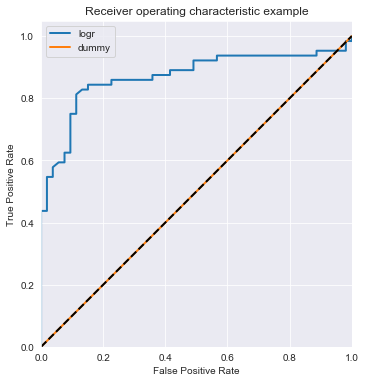

In [82]:
fpr_dummy, tpr_dummy, _ = roc_curve(y_train, dummy_cl.predict_proba(X_train)[:,1]) # Compare dummy
curves.append((fpr_dummy,tpr_dummy,'dummy')); plot_roc(curves);

Compare with KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
params = {'n_neighbors':[3,5,15,20]}
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      params, 
                      cv=5,
                      scoring='f1')
gs_knn.fit(X_train,y_train)
y_pred_knn = gs_knn.predict_proba(X_train)
print(gs_knn.best_params_)

{'n_neighbors': 15}


/Users/alexli/anaconda3/envs/alexli/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


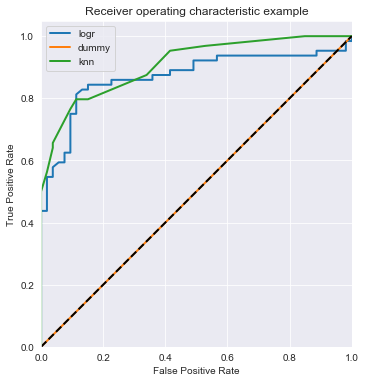

In [84]:
fpr_knn, tpr_knn, _ = roc_curve(y_train, y_pred_knn[:,1])
curves.append((fpr_knn,tpr_knn,'knn')); plot_roc(curves);

Similarly, there's a good value for quantify the curve, AUC(area under the curve)

In [88]:
from sklearn.metrics import roc_auc_score
for name,model in [('dummy',dummy_cl),('logr',logr),('knn',gs_knn)]:
    y_pred = model.predict_proba(X_train)
    auc = roc_auc_score(y_train,y_pred[:,1])
    print('{:5s} auc = {:0.3f}'.format(name,auc))

dummy auc = 0.500
logr  auc = 0.871
knn   auc = 0.909


After finish the selection, test the test set

In [90]:
gs_knn.score(X_test,y_test)

0.6